# TBX5
[Holt-Oram syndrome](https://omim.org/entry/142900) (HOS) is an autosomal dominant diseasse characterized by  congenital heart defects (CHD), with or without rhythm disturbances and radial defects such as aplasia of the radius or the thumb. HOS is caused by pathogenic variants in the [TBX5](https://omim.org/entry/601620) gene.

Several previous publications have reported candidate genotype-phenotype correlations in HOS.

[Brassington et al. (2003)](https://pubmed.ncbi.nlm.nih.gov/12789647/) stated that

> neither the type of mutation in TBX5 nor the location of a mutation in the T box is predictive of the expressivity of malformations in individuals with HOS.



[Krakow (2013)](https://www.sciencedirect.com/book/9780123838346/emery-and-rimoins-principles-and-practice-of-medical-genetics)  stated

> Defects producing null alleles are predicted to produce both limb and heart defects; however, specific missense mutations produce either significant cardiac defects with minor skeletal anomalies, or the converse.

(I do not have access this this, and apparently this is reference 183 in this chapter)


[Vanlerberghe et al. (2019)](https://pubmed.ncbi.nlm.nih.gov/30552424/) report:

> We observed that isolated septal CHD are more common in the truncating than in the missense variants (p = 0.02). 
> Besides, complex CHD associated to septal defect seems  to be more common in case of missense variants (p = 0.053). 
> Thus, we observed a tendency of less severe CHD in patients with truncating variants compared to the patients with missense variants. 
> No significant difference was observed in the type or the severity of upper limb defects between the two groups.



TODO -- find more comprehensive collection of citations for TBX5. At the end of the introduction for a gene, we would write something like this.

Therefore, we tested missense vs other variants (inspection of the distribution of variants showed that the other variant categories in our dataset are nonsense, frameshift, and a smaller number of inframe indels, all of which we deemed to be null variants for the purposes of this analysis). We also tested the two most common missense variatns (DETAILS) for correlations.

In [1]:
import gpsea
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from gpsea.analysis.predicate import PatientCategories
from gpsea.preprocessing import load_phenopacket_folder
from gpsea.preprocessing import configure_caching_cohort_creator
from gpsea.model import FeatureType, VariantEffect
from gpsea.view import CohortViewable
from gpsea.preprocessing import UniprotProteinMetadataService
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService
from gpsea.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable
import hpotk
from IPython.display import display, HTML


store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.2.1.dev0


In [2]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_name = 'TBX5'
phenopacket_store_release = '0.1.19'
TBX5_MANE_transcript = 'NM_181486.4'
TBX5_protein_id = "NP_852259.1"

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Patients Created: 100%|██████████| 156/156 [01:28<00:00,  1.77it/s]
Validated under none policy
No errors or warnings were found


In [3]:
cv = CohortViewable(hpo=hpo)
html = cv.process(cohort=cohort, transcript_id=TBX5_MANE_transcript)
display(HTML(html))

HPO Term,ID,Seen in n individuals
Atrial septal defect,HP:0001631,50
Ventricular septal defect,HP:0001629,41
Hypoplasia of the radius,HP:0002984,40
Triphalangeal thumb,HP:0001199,36
Short thumb,HP:0009778,32
Absent thumb,HP:0009777,32
Abnormal carpal morphology,HP:0001191,30
Secundum atrial septal defect,HP:0001684,27
Absent radius,HP:0003974,15
Cardiac conduction abnormality,HP:0031546,14


In [5]:
pms = UniprotProteinMetadataService()
protein_meta = pms.annotate(TBX5_protein_id)
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(TBX5_MANE_transcript)
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

In [6]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature
Disordered,region,1 - 46,13
Disordered,region,250 - 356,19


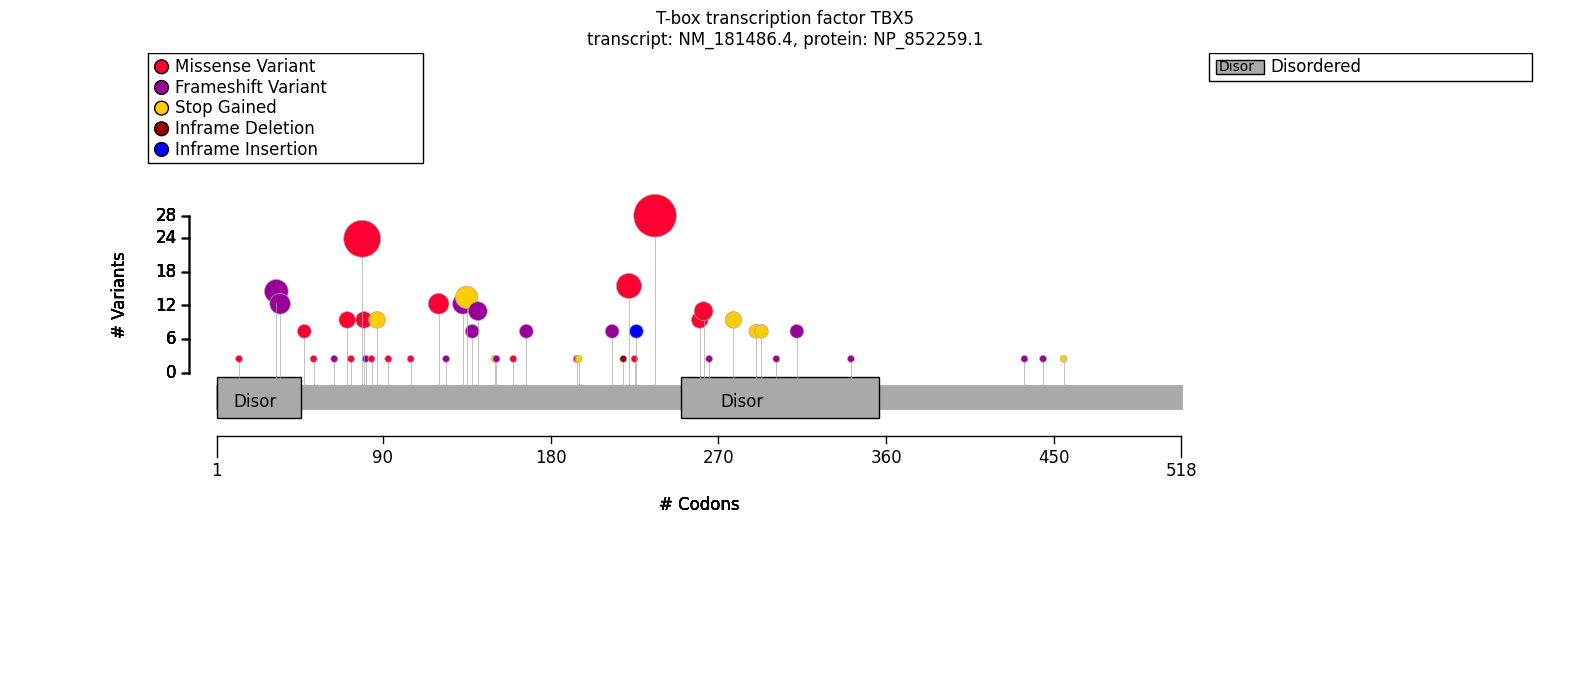

In [7]:
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis);

# Correlation analysis

In [8]:
analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False
analysis_config.hpo_mtc_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [9]:
from gpsea.analysis.predicate.genotype import VariantPredicates, ProteinPredicates

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=TBX5_MANE_transcript)
frameshift = analysis.compare_hpo_vs_genotype(is_missense)
frameshift.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_181486.4                      Yes             No  \
                                                   Count Percent  Count   
Ventricular septal defect [HP:0001629]             31/60     52%  30/30   
Patent ductus arteriosus [HP:0001643]               3/37      8%    5/5   
Abnormal atrioventricular conduction [HP:0005150]   0/22      0%    4/4   
Atrioventricular block [HP:0001678]                 0/22      0%    3/3   
Heart block [HP:0012722]                            0/22      0%    3/3   
First degree atrioventricular block [HP:0011705]    0/22      0%    2/2   
Persistent left superior vena cava [HP:0005301]     2/37      5%    2/2   
Triphalangeal thumb [HP:0001199]                   13/72     18%  23/59   
Cardiac conduction abnormality [HP:0031546]        14/36     39%    4/4   
Absent thumb [HP:0009777]                          12/71     17%  20/60   
Short thumb [HP:0009778]                           11/41     27%  22/58   
Hypoplasia of the ulna [HP:0003022]                 1/12      8%   4/15   
Hypoplasia of the radius [HP:0002984]              30/62     48%  10/27   
Secundum atrial septal defect [HP:0001684]         14/35     40%  13/42   
Atrial septal defect [HP:0001631]                  42/44     95%  41/41   
Pulmonary arterial hypertension [HP:0002092]         4/6     67%   4/10   
Short humerus [HP:0005792]                          7/17     41%   5/13   

MISSENSE_VARIANT on NM_181486.4                                          \
                                                  Percent       p value   
Ventricular septal defect [HP:0001629]               100%  4.634415e-07   
Patent ductus arteriosus [HP:0001643]                100%  6.583062e-05   
Abnormal atrioventricular conduction [HP:0005150]    100%  6.688963e-05   
Atrioventricular block [HP:0001678]                  100%  4.347826e-04   
Heart block [HP:0012722]                             100%  4.347826e-04   
First degree atrioventricular block [HP:0011705]     100%  3.623188e-03   
Persistent left superior vena cava [HP:0005301]      100%  8.097166e-03   
Triphalangeal thumb [HP:0001199]                      39%  1.033546e-02   
Cardiac conduction abnormality [HP:0031546]          100%  3.348288e-02   
Absent thumb [HP:0009777]                             33%  4.072944e-02   
Short thumb [HP:0009778]                              38%  2.846573e-01   
Hypoplasia of the ulna [HP:0003022]                   27%  3.418803e-01   
Hypoplasia of the radius [HP:0002984]                 37%  3.614380e-01   
Secundum atrial septal defect [HP:0001684]            31%  4.756945e-01   
Atrial septal defect [HP:0001631]                    100%  4.946779e-01   
Pulmonary arterial hypertension [HP:0002092]          40%  6.083916e-01   
Short humerus [HP:0005792]                            38%  1.000000e+00   

MISSENSE_VARIANT on NM_181486.4                                      
                                                  Corrected p value  
Ventricular septal defect [HP:0001629]                     0.000008  
Patent ductus arteriosus [HP:0001643]                      0.001119  
Abnormal atrioventricular conduction [HP:0005150]          0.001137  
Atrioventricular block [HP:0001678]                        0.007391  
Heart block [HP:0012722]                                   0.007391  
First degree atrioventricular block [HP:0011705]           0.061594  
Persistent left superior vena cava [HP:0005301]            0.137652  
Triphalangeal thumb [HP:0001199]                           0.175703  
Cardiac conduction abnormality [HP:0031546]                0.569209  
Absent thumb [HP:0009777]                                  0.692401  
Short thumb [HP:0009778]                                   1.000000  
Hypoplasia of the ulna [HP:0003022]                        1.000000  
Hypoplasia of the radius [HP:0002984]                      1.000000  
Secundum atrial septal defect [HP:0001684]                 1.000000  
Atrial septal defect [HP:000

# c.710G>A	
This variant, a missense variant, p.Arg237Gln, occurs 22 times in our cohort and is listed as Pathogenic/Likely Pathogenic in [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/variation/7993/).

We need to use the following key (available in the above table): **12_114385521_114385521_C_T**.

In [10]:
is_var_key = VariantPredicates.variant_key("12_114385521_114385521_C_T")

feature = analysis.compare_hpo_vs_genotype(is_var_key)
feature.summarize(hpo, PatientCategories.YES)

variant has ID of 12_114385521_114385521_C_T         Yes              No  \
                                                   Count Percent   Count   
Ventricular septal defect [HP:0001629]              0/17      0%   61/73   
Upper limb phocomelia [HP:0009813]                  7/22     32%   3/131   
Cardiac conduction abnormality [HP:0031546]         1/16      6%   17/24   
Patent ductus arteriosus [HP:0001643]               0/16      0%    8/26   
Abnormal atrioventricular conduction [HP:0005150]   0/15      0%    4/11   
Atrioventricular block [HP:0001678]                 0/15      0%    3/10   
Heart block [HP:0012722]                            0/15      0%    3/10   
Short thumb [HP:0009778]                             0/7      0%   33/92   
First degree atrioventricular block [HP:0011705]    0/15      0%     2/9   
Patent foramen ovale [HP:0001655]                    1/4     25%   3/101   
Atrial septal defect [HP:0001631]                   9/10     90%   74/75   
Triphalangeal thumb [HP:0001199]                    2/15     13%  34/116   
Absent thumb [HP:0009777]                           2/15     13%  30/116   
Hypoplasia of the radius [HP:0002984]               8/14     57%   32/75   
Hypoplasia of the ulna [HP:0003022]                  1/3     33%    4/24   
Secundum atrial septal defect [HP:0001684]           2/4     50%   25/73   
Abnormal carpal morphology [HP:0001191]            11/12     92%   19/20   
Absent radius [HP:0003974]                           0/3      0%   15/65   
Short humerus [HP:0005792]                           1/3     33%   11/27   

variant has ID of 12_114385521_114385521_C_T                             \
                                                  Percent       p value   
Ventricular septal defect [HP:0001629]                84%  5.553731e-11   
Upper limb phocomelia [HP:0009813]                     2%  4.547525e-05   
Cardiac conduction abnormality [HP:0031546]           71%  6.156310e-05   
Patent ductus arteriosus [HP:0001643]                 31%  1.586531e-02   
Abnormal atrioventricular conduction [HP:0005150]     36%  2.207358e-02   
Atrioventricular block [HP:0001678]                   30%  5.217391e-02   
Heart block [HP:0012722]                              30%  5.217391e-02   
Short thumb [HP:0009778]                              36%  9.170711e-02   
First degree atrioventricular block [HP:0011705]      22%  1.304348e-01   
Patent foramen ovale [HP:0001655]                      3%  1.458727e-01   
Atrial septal defect [HP:0001631]                     99%  2.226891e-01   
Triphalangeal thumb [HP:0001199]                      29%  2.352962e-01   
Absent thumb [HP:0009777]                             26%  3.581340e-01   
Hypoplasia of the radius [HP:0002984]                 43%  3.862696e-01   
Hypoplasia of the ulna [HP:0003022]                   17%  4.735043e-01   
Secundum atrial septal defect [HP:0001684]            34%  6.089487e-01   
Abnormal carpal morphology [HP:0001191]               95%  1.000000e+00   
Absent radius [HP:0003974]                            23%  1.000000e+00   
Short humerus [HP:0005792]                            41%  1.000000e+00   

variant has ID of 12_114385521_114385521_C_T                         
                                                  Corrected p value  
Ventricular septal defect [HP:0001629]                 1.055209e-09  
Upper limb phocomelia [HP:0009813]                     8.640297e-04  
Cardiac conduction abnormality [HP:0031546]            1.169699e-03  
Patent ductus arteriosus [HP:0001643]                  3.014408e-01  
Abnormal atrioventricular conduction [HP:0005150]      4.193980e-01  
Atrioventricular block [HP:0001678]                    9.913043e-01  
Heart block [HP:0012722]                               9.913043e-01  
Short thumb [HP:0009778]                               1.000000e+00  
First degree atrioventricular block [HP:0011705]       1.000000e+00  
Patent foramen ovale [HP:0001655]                      1.

# c.238G>A
This variant, also a missense variant, p.Gly80Arg, was observed 20 times in our cohort. It is listed as Pathogenic in [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/variation/7994/).

We need to use the key **12_114401830_114401830_C_T**.

In [11]:
is_var_key = VariantPredicates.variant_key("12_114401830_114401830_C_T")

feature = analysis.compare_hpo_vs_genotype(is_var_key)
feature.summarize(hpo, PatientCategories.YES)

variant has ID of 12_114401830_114401830_C_T         Yes              No  \
                                                   Count Percent   Count   
Cardiac conduction abnormality [HP:0031546]        13/20     65%    5/20   
Absent thumb [HP:0009777]                           1/19      5%  31/112   
Atrial septal defect [HP:0001631]                    7/8     88%   76/77   
Patent ductus arteriosus [HP:0001643]               2/20     10%    6/22   
Triphalangeal thumb [HP:0001199]                    3/19     16%  33/112   
Abnormal atrioventricular conduction [HP:0005150]    0/7      0%    4/19   
Ventricular septal defect [HP:0001629]             13/20     65%   48/70   
Abnormal carpal morphology [HP:0001191]            18/19     95%   12/13   
Secundum atrial septal defect [HP:0001684]           0/1      0%   27/76   
Hypoplasia of the radius [HP:0002984]               9/19     47%   31/70   

variant has ID of 12_114401830_114401830_C_T                         \
                                                  Percent   p value   
Cardiac conduction abnormality [HP:0031546]           25%  0.024842   
Absent thumb [HP:0009777]                             28%  0.042142   
Atrial septal defect [HP:0001631]                     99%  0.180392   
Patent ductus arteriosus [HP:0001643]                 27%  0.243091   
Triphalangeal thumb [HP:0001199]                      29%  0.275107   
Abnormal atrioventricular conduction [HP:0005150]     21%  0.546288   
Ventricular septal defect [HP:0001629]                69%  0.790234   
Abnormal carpal morphology [HP:0001191]               92%  1.000000   
Secundum atrial septal defect [HP:0001684]            36%  1.000000   
Hypoplasia of the radius [HP:0002984]                 44%  1.000000   

variant has ID of 12_114401830_114401830_C_T                         
                                                  Corrected p value  
Cardiac conduction abnormality [HP:0031546]                0.248417  
Absent thumb [HP:0009777]                                  0.421418  
Atrial septal defect [HP:0001631]                          1.000000  
Patent ductus arteriosus [HP:0001643]                      1.000000  
Triphalangeal thumb [HP:0001199]                           1.000000  
Abnormal atrioventricular conduction [HP:0005150]          1.000000  
Ventricular septal defect [HP:0001629]                     1.000000  
Abnormal carpal morphology [HP:0001191]                    1.000000  
Secundum atrial septal defect [HP:0001684]                 1.000000  
Hypoplasia of the radius [HP:0002984]                      1.000000